Summary of data exploration

All the data timepoints start with the year 2000. 

There are no missing values in all 4 datasets.

There are no duplicates in all 4 datasets.

There are outliers in the PAKE and PASE columns for all 4 timepoints. 

The descriptive statistics seem reasonable for all the data points and timepoints. For example, the mean decreases for each field between the round of 64 to champion which makes sense because there are fewer games played in each round. There are zeros for most of the minimum values because many teams have never won a game in the tournament. The loss column minimum is 1 for all the timepoints because no team has won every tournament since 2000.  

The count of the tourney stats which represent the games goes down for each dataset. Which is expected because there shouldn't be more games played in 2016 than 2023. 

PAKE and PASE for 2023 and 2016 follow a similar pattern of higher ranked teams having higher numbers, middle rankings flattening the curve and then taking a dip for lowest ranked teams. 2015 and 2008 data are a little more variable. 



PAKE = Performance against Komputer expectations

PASE = Performance against seed expectations


In [1]:
import pandas as pd

In [2]:
# imports and setup 
import pandas as pd
import scipy as sc
import numpy as np

import statsmodels.formula.api as sm # For regression analysis

#%matplotlib notebook
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

In [3]:
#creating a random sample to pick what years to train on
import random
x = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23]
random.sample(x, 3)

[9, 12, 22]

In [53]:
tourney_stats_2023 = pd.read_csv("tourney_stats_2023.csv")
tourney_stats_2023.head()

,RK,TEAM,PAKE,PASE,WINS,LOSS,W%,R64,R32,S16,E8,F4,F2,CHAMP,TOP2,F4%,CHAMP%
0,1,North Carolina,15.0,13.3,55,16,0.775,19,18,12,10,7,5,3,11,99.10%,70.00%
1,2,Connecticut,12.7,14.0,39,11,0.780,15,11,8,7,5,4,4,5,91.50%,47.70%
2,3,Michigan St.,12.4,15.4,49,21,0.700,22,17,13,9,7,2,1,6,97.90%,60.10%
3,4,UCLA,10.5,11.5,35,16,0.686,16,14,12,4,4,1,0,4,88.20%,38.40%
4,5,Butler,9.2,10.9,22,13,0.629,13,11,5,2,2,2,0,0,43.70%,6.70%


PAKE = performace against Komputer expectations
PASE = performace against seed expectations


In [54]:
tourney_stats_2023.describe()

,RK,PAKE,PASE,WINS,LOSS,W%,R64,R32,S16,E8,F4,F2,CHAMP,TOP2
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,133.500000,-0.011654,-0.003759,5.447368,5.447368,0.261714,5.533835,2.766917,1.383459,0.691729,0.345865,0.172932,0.086466,0.691729
std,76.931788,2.656025,2.841416,10.306210,4.858668,0.249483,5.050012,4.265504,2.812967,1.736100,1.050032,0.632590,0.438743,2.076574
min,1.000000,-8.300000,-9.100000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.250000,-0.900000,-1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,133.500000,-0.200000,-0.200000,1.000000,4.000000,0.250000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,199.750000,0.475000,0.500000,5.000000,8.000000,0.500000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,266.000000,15.000000,15.400000,58.000000,23.000000,0.780000,23.000000,21.000000,16.000000,11.000000,7.000000,5.000000,4.000000,17.000000


In [55]:
tourney_stats_2023.isnull().values.any()

False

In [56]:
tourney_stats_2023.duplicated().values.any()

False

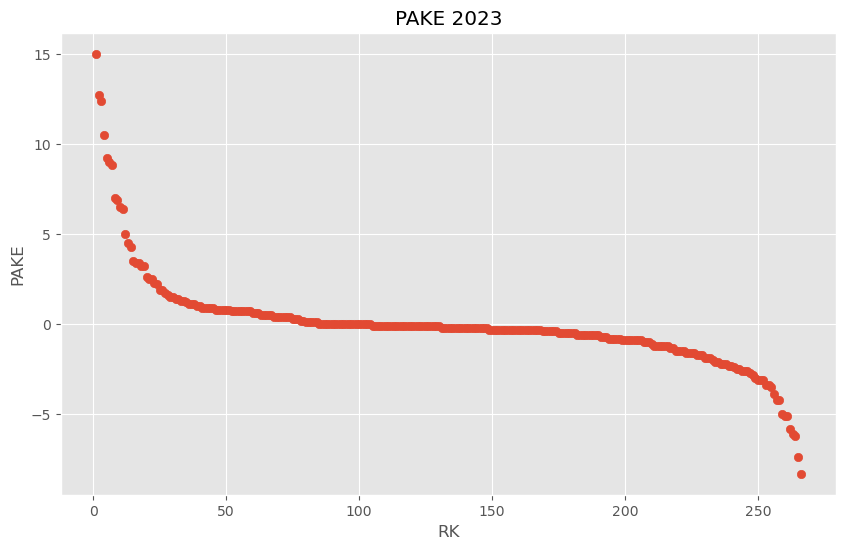

In [80]:
plt.scatter(tourney_stats_2023['RK'], tourney_stats_2023['PAKE'])
plt.ylabel('PAKE')
plt.xlabel('RK')
plt.title('PAKE 2023')
plt.show()

Text(0.5, 1.0, 'PAKE 2023')

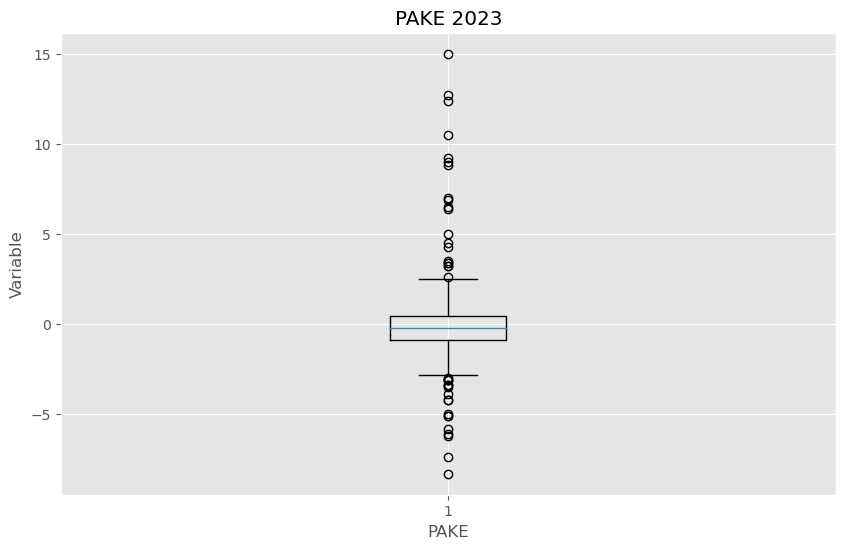

In [79]:
plt.boxplot(tourney_stats_2023['PAKE'])
plt.ylabel('Variable')
plt.xlabel('PAKE')
plt.title('PAKE 2023')


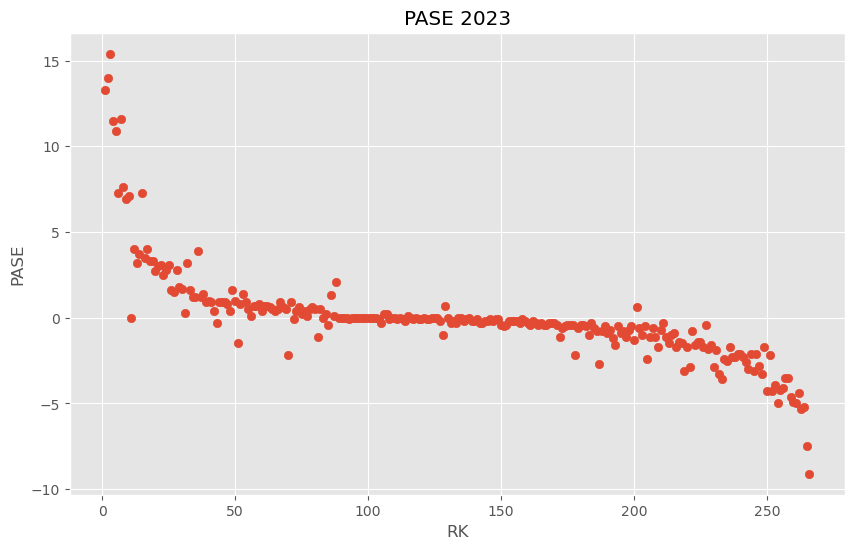

In [78]:
plt.scatter(tourney_stats_2023['RK'], tourney_stats_2023['PASE'])
plt.ylabel('PASE')
plt.xlabel('RK')
plt.title('PASE 2023')
plt.show()

Text(0.5, 1.0, 'PASE 2023')

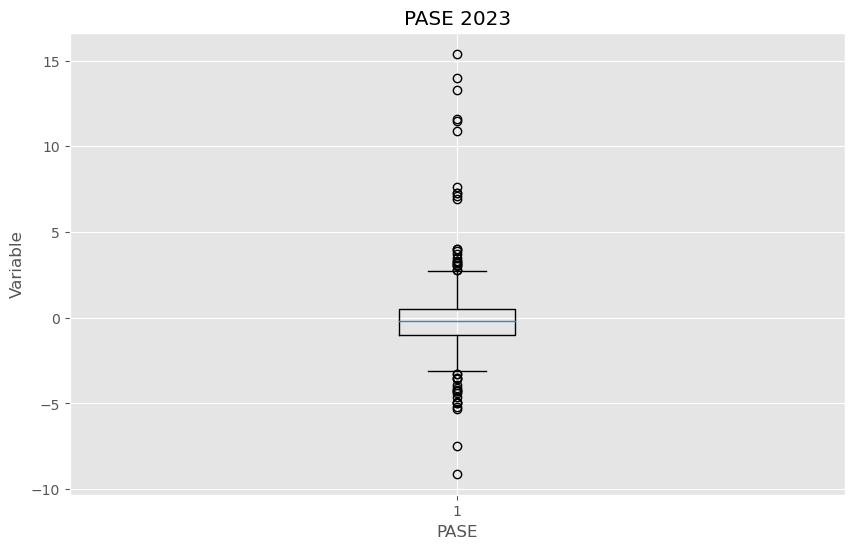

In [77]:
plt.boxplot(tourney_stats_2023['PASE'])
plt.ylabel('Variable')
plt.xlabel('PASE')
plt.title('PASE 2023')

In [24]:
tourney_stats_2016 = pd.read_csv("tourney_stats_2016.csv")
tourney_stats_2016.head()

,RK,TEAM,PAKE,PASE,WINS,LOSS,W%,R64,R32,S16,E8,F4,F2,CHAMP,TOP2,F4%,CHAMP%
0,1,Connecticut,11.7,11.6,33,9,0.786,12,10,7,6,4,3,3,5,86.20%,38.20%
1,2,North Carolina,10.8,9.6,41,12,0.774,14,14,9,8,5,3,2,8,97.40%,62.40%
2,3,Michigan St.,10.7,13.0,40,16,0.714,17,12,11,8,6,2,1,5,96.00%,54.90%
3,4,Butler,9.0,10.1,19,11,0.633,11,9,4,2,2,2,0,0,36.20%,5.00%
4,5,UCLA,8.2,7.9,25,12,0.676,12,10,8,3,3,1,0,3,76.80%,27.10%


In [25]:
tourney_stats_2016.describe()

,RK,PAKE,PASE,WINS,LOSS,W%,R64,R32,S16,E8,F4,F2,CHAMP,TOP2
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,121.000000,-0.014108,-0.002905,4.443983,4.443983,0.253581,4.514523,2.257261,1.128631,0.564315,0.282158,0.141079,0.070539,0.564315
std,69.714896,2.215638,2.394689,8.332540,3.781255,0.255457,3.937109,3.382584,2.272125,1.465226,0.896320,0.521230,0.364010,1.626926
min,1.000000,-6.700000,-5.600000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.000000,-0.800000,-0.800000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,121.000000,-0.200000,-0.200000,1.000000,3.000000,0.231000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,181.000000,0.300000,0.400000,5.000000,6.000000,0.500000,6.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,241.000000,11.700000,13.000000,42.000000,17.000000,0.786000,17.000000,15.000000,13.000000,8.000000,6.000000,3.000000,3.000000,13.000000


In [26]:
tourney_stats_2016.isnull().values.any()

False

In [27]:
tourney_stats_2016.duplicated().values.any()

False

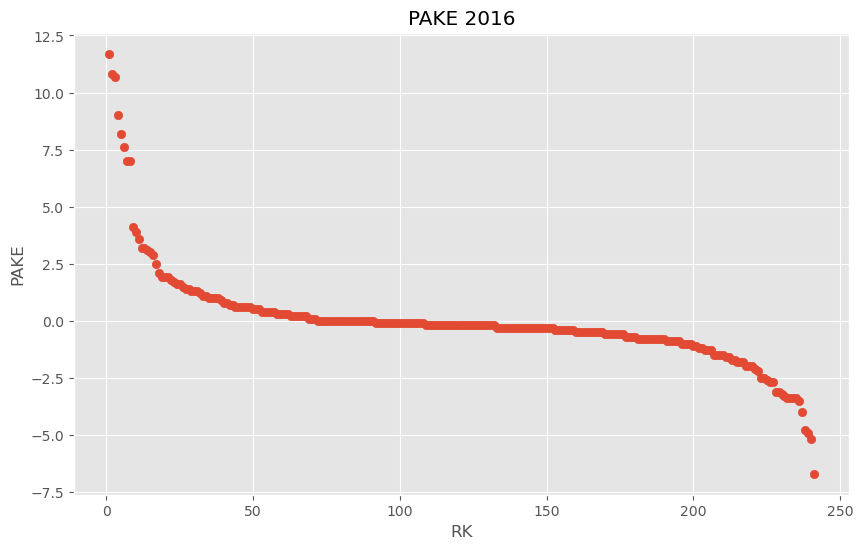

In [76]:
plt.scatter(tourney_stats_2016['RK'], tourney_stats_2016['PAKE'])
plt.ylabel('PAKE')
plt.xlabel('RK')
plt.title('PAKE 2016')
plt.show()

Text(0.5, 1.0, 'PAKE 2016')

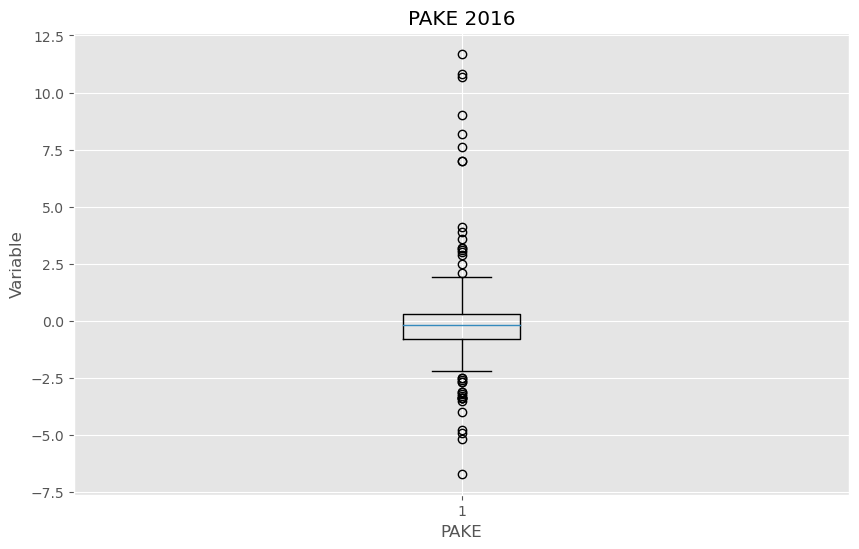

In [75]:
plt.boxplot(tourney_stats_2016['PAKE'])
plt.ylabel('Variable')
plt.xlabel('PAKE')
plt.title('PAKE 2016')

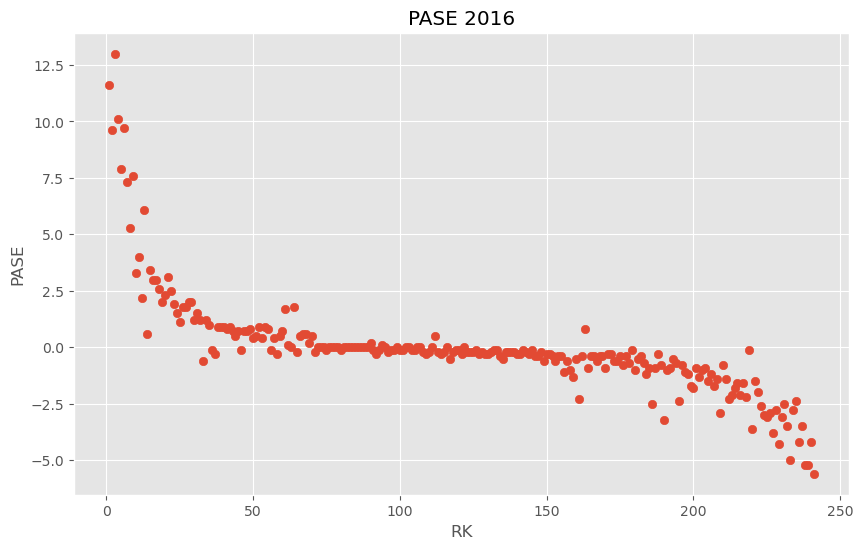

In [74]:
plt.scatter(tourney_stats_2016['RK'], tourney_stats_2016['PASE'])
plt.ylabel('PASE')
plt.xlabel('RK')
plt.title('PASE 2016')
plt.show()

Text(0.5, 1.0, 'PASE 2016')

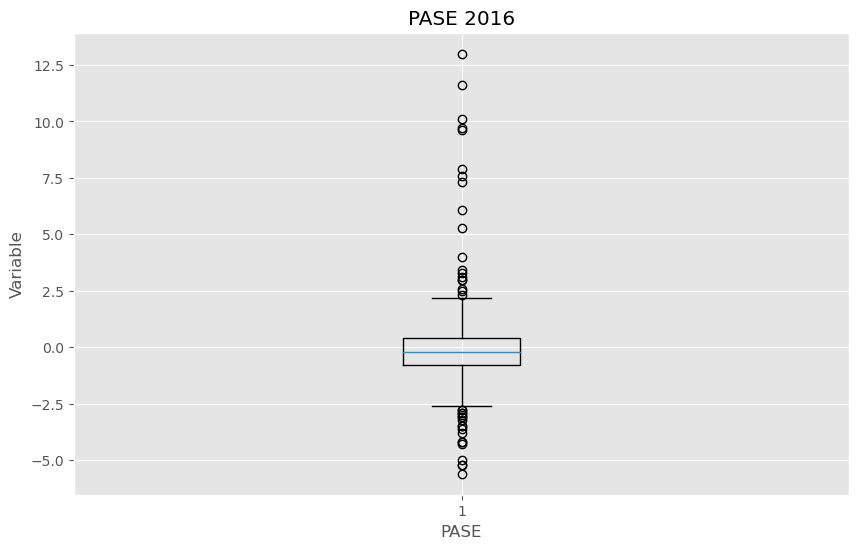

In [73]:
plt.boxplot(tourney_stats_2016['PASE'])
plt.ylabel('Variable')
plt.xlabel('PASE')
plt.title('PASE 2016')

In [35]:
tourney_stats_2015 = pd.read_csv("tourney_stats_2015.csv")
tourney_stats_2015.head()

,RK,TEAM,PAKE,PASE,WINS,LOSS,W%,R64,R32,S16,E8,F4,F2,CHAMP,TOP2,F4%,CHAMP%
0,1,Duke,-1.3,-3.7,40,13,0.755,16,13,12,5,4,3,3,13,99.80%,84.60%
1,2,Kansas,3.1,0.9,39,15,0.722,16,14,10,7,4,3,1,10,98.70%,71.80%
2,3,Kentucky,7.8,7.8,36,13,0.735,14,13,9,7,4,2,1,7,97.50%,66.30%
3,4,North Carolina,8.9,7.9,36,11,0.766,13,13,8,7,4,2,2,7,95.60%,56.00%
4,5,Florida,7.6,9.7,33,11,0.750,13,10,7,7,4,3,2,4,94.30%,55.90%


In [36]:
tourney_stats_2015.describe()

,RK,PAKE,PASE,WINS,LOSS,W%,R64,R32,S16,E8,F4,F2,CHAMP,TOP2
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,117.500000,-0.014103,-0.001282,4.307692,4.307692,0.254239,4.376068,2.188034,1.094017,0.547009,0.273504,0.136752,0.068376,0.547009
std,67.694165,2.239907,2.448289,7.988685,3.578576,0.257610,3.728389,3.237208,2.172726,1.411150,0.865395,0.505862,0.364203,1.566800
min,1.000000,-6.000000,-5.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.250000,-0.800000,-0.800000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,117.500000,-0.200000,-0.200000,1.000000,3.000000,0.215500,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,175.750000,0.275000,0.400000,4.750000,6.000000,0.500000,6.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,234.000000,13.000000,15.300000,40.000000,16.000000,0.800000,16.000000,14.000000,12.000000,8.000000,6.000000,3.000000,3.000000,13.000000


In [37]:
tourney_stats_2015.isnull().values.any()

False

In [38]:
tourney_stats_2015.duplicated().values.any()

False

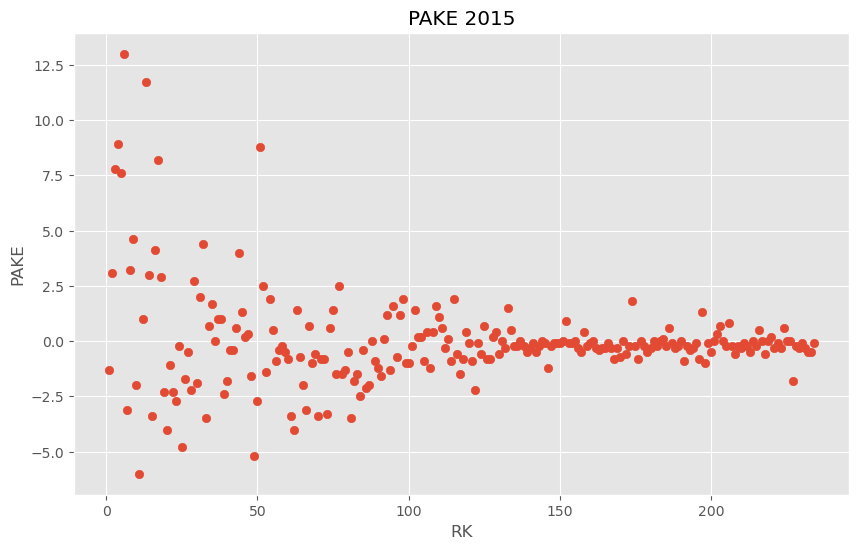

In [72]:
plt.scatter(tourney_stats_2015['RK'], tourney_stats_2015['PAKE'])
plt.ylabel('PAKE')
plt.xlabel('RK')
plt.title('PAKE 2015')
plt.show()

Text(0.5, 1.0, 'PAKE 2015')

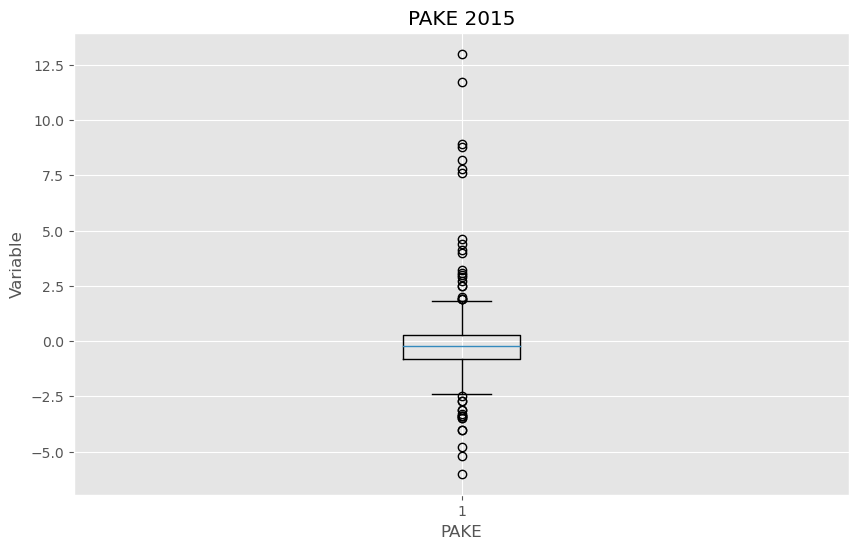

In [71]:
plt.boxplot(tourney_stats_2015['PAKE'])
plt.ylabel('Variable')
plt.xlabel('PAKE')
plt.title('PAKE 2015')

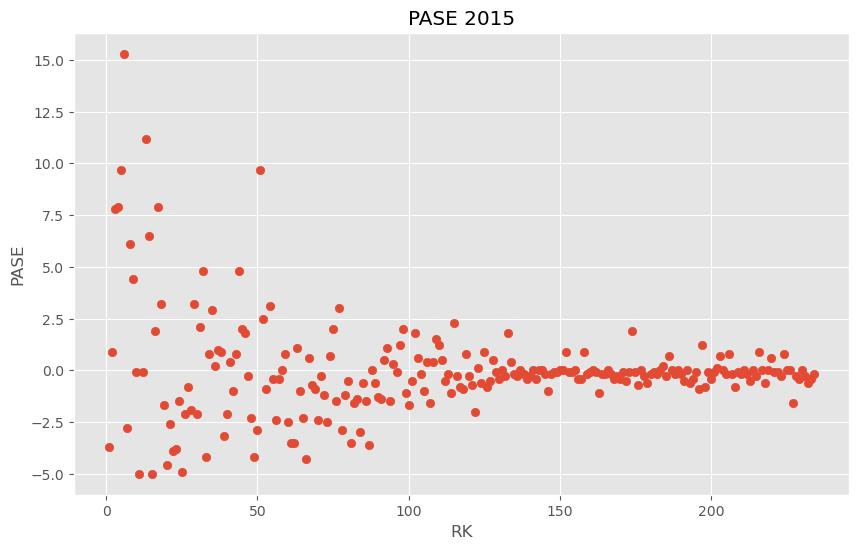

In [70]:
plt.scatter(tourney_stats_2015['RK'], tourney_stats_2015['PASE'])
plt.ylabel('PASE')
plt.xlabel('RK')
plt.title('PASE 2015')
plt.show()

Text(0.5, 1.0, 'PASE 2015')

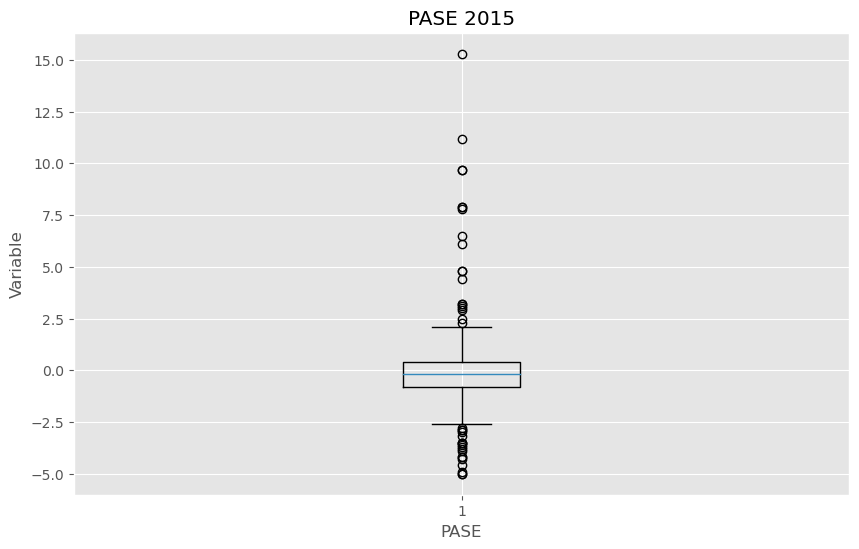

In [69]:
plt.boxplot(tourney_stats_2015['PASE'])
plt.ylabel('Variable')
plt.xlabel('PASE')
plt.title('PASE 2015')

In [41]:
tourney_stats_2008 = pd.read_csv("tourney_stats_2008.csv")
tourney_stats_2008.head()

,RK,TEAM,PAKE,PASE,WINS,LOSS,W%,R64,R32,S16,E8,F4,F2,CHAMP,TOP2,F4%,CHAMP%
0,1,Duke,-3.8,-4.0,21,8,0.724,9,8,7,2,2,1,1,7,98.20%,72.80%
1,2,Kansas,4.4,4.6,24,8,0.750,9,7,6,5,3,2,1,4,91.40%,52.50%
2,3,Illinois,-0.9,0.6,15,8,0.652,8,7,4,2,1,1,0,2,84.00%,42.80%
3,4,North Carolina,4.1,4.2,20,6,0.769,7,7,4,4,3,1,1,4,86.60%,40.80%
4,5,Michigan St.,5.1,7.0,20,8,0.714,9,6,5,4,3,1,1,2,85.90%,40.00%


In [42]:
tourney_stats_2008.describe()

,RK,PAKE,PASE,WINS,LOSS,W%,R64,R32,S16,E8,F4,F2,CHAMP,TOP2
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,97.000000,-0.007254,-0.002073,2.937824,2.937824,0.261503,2.984456,1.492228,0.746114,0.373057,0.186528,0.093264,0.046632,0.373057
std,55.858452,1.456254,1.632737,4.861227,2.132650,0.273956,2.220822,2.036437,1.339620,0.869446,0.574116,0.355912,0.234746,0.987262
min,1.000000,-4.700000,-6.300000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,-0.600000,-0.600000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,-0.200000,-0.200000,1.000000,2.000000,0.200000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,145.000000,0.400000,0.400000,4.000000,4.000000,0.500000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,193.000000,7.000000,7.100000,24.000000,9.000000,0.769000,9.000000,8.000000,7.000000,5.000000,3.000000,3.000000,2.000000,7.000000


In [43]:
tourney_stats_2008.isnull().values.any()

False

In [44]:
tourney_stats_2008.duplicated().values.any()

False

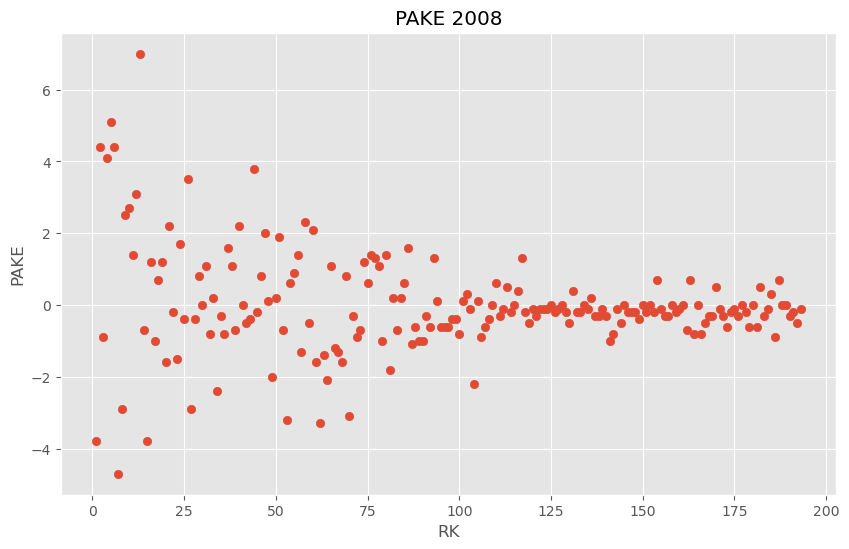

In [62]:
plt.scatter(tourney_stats_2008['RK'], tourney_stats_2008['PAKE'])
plt.ylabel('PAKE')
plt.xlabel('RK')
plt.title('PAKE 2008')
plt.show()

Text(0.5, 1.0, 'PAKE 2008')

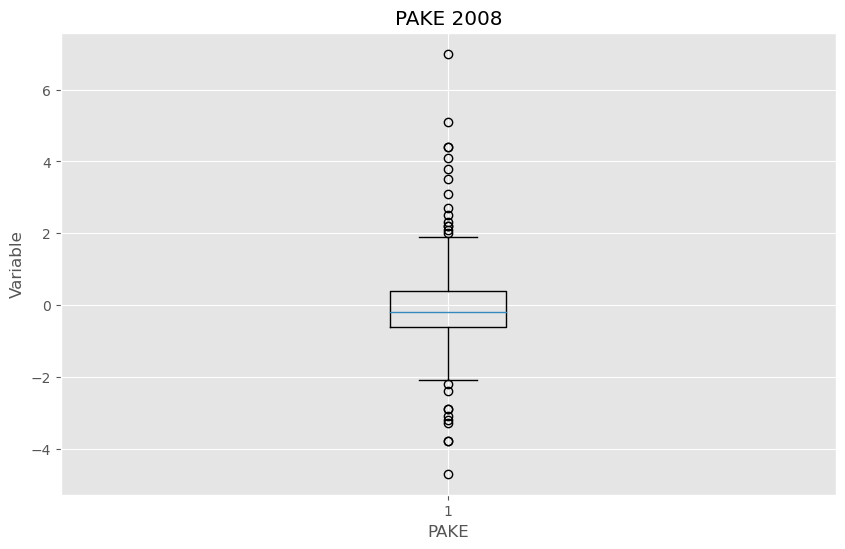

In [61]:
plt.boxplot(tourney_stats_2008['PAKE'])
plt.ylabel('Variable')
plt.xlabel('PAKE')
plt.title('PAKE 2008')

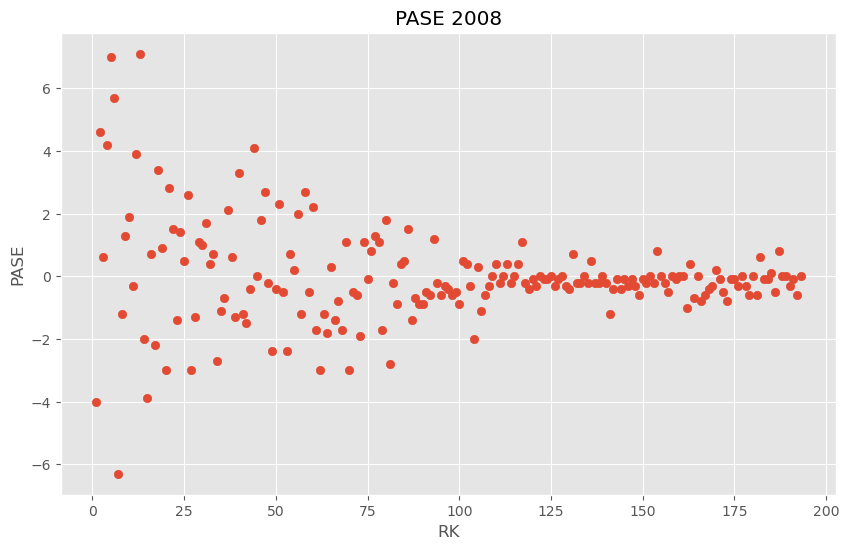

In [60]:
plt.scatter(tourney_stats_2008['RK'], tourney_stats_2008['PASE'])
plt.ylabel('PASE')
plt.xlabel('RK')
plt.title('PASE 2008')
plt.show()

Text(0.5, 1.0, 'PASE 2008')

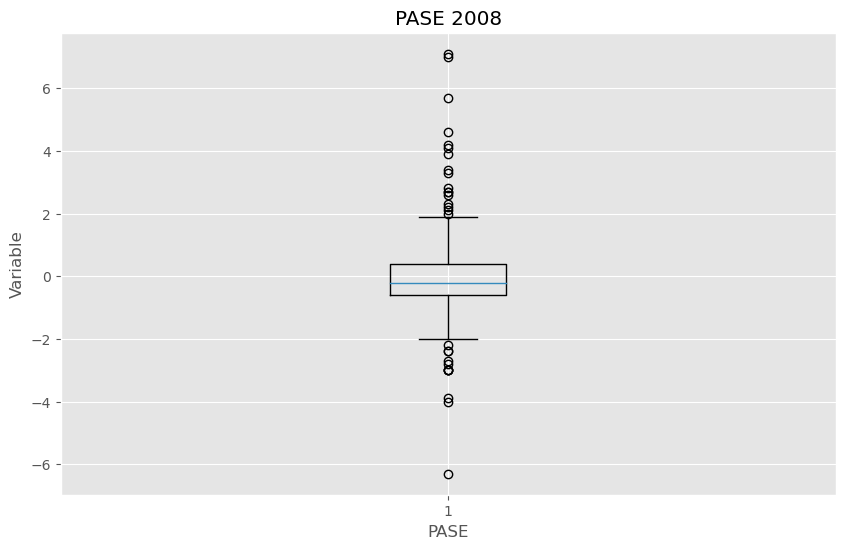

In [59]:
plt.boxplot(tourney_stats_2008['PASE'])
plt.ylabel('Variable')
plt.xlabel('PASE')
plt.title('PASE 2008')